In [1]:
import kooplearn
import kooplearn.datasets
import matplotlib.pyplot as plt


In [2]:
import logging
import math
from pathlib import Path
from typing import Optional

import numpy as np
import scipy
import scipy.sparse
from scipy.integrate import romb
from scipy.special import binom
from scipy.stats.sampling import NumericalInversePolynomial

from kooplearn._src.utils import topk
from kooplearn.datasets.misc import (
    DataGenerator,
    DiscreteTimeDynamics,
    LinalgDecomposition,
)

from kooplearn.datasets.stochastic import LangevinTripleWell1D


In [3]:
langevin = LangevinTripleWell1D(rng_seed=0,gamma=2.0,dt=1e-4)

In [4]:
sample = langevin.sample(0, 1_000_000)

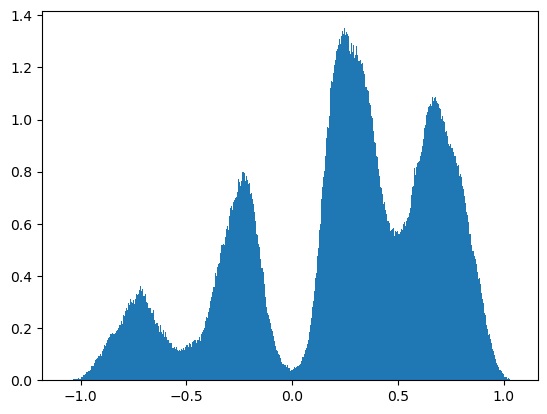

In [5]:
plt.hist(sample, bins=500, density=True);

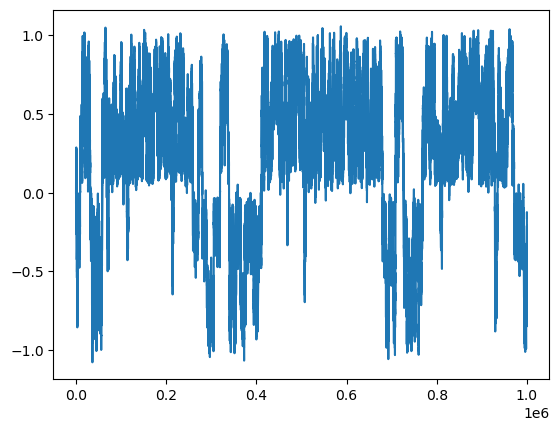

In [6]:
plt.plot(sample)


In [7]:
from kooplearn.data import traj_to_contexts
from kooplearn._src.linalg import _rank_reveal, modified_QR, weighted_norm
from kooplearn._src.utils import fuzzy_parse_complex, topk
import tqdm
from utils import *


0.05
5
2
(-0.9123438643262194+0j)
0.05
5


/tmp/ipykernel_208818/3412763194.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_ev, sorted_evecs, s[i,j] = make_fit(sigma_v[i,j],gamma_v[i,j],5,sample[::500],4,1/2)


2
(-0.8665546816354377+0j)
0.05
5
2
(-0.8355527893450629+0j)
0.05
5
2
(-0.79562514883966+0j)
0.05
5
2
(-0.7697625237067109+0j)
0.05
5
2
(-0.7639854594654079+0j)
0.05
5
2
(-0.7598016178442686+0j)
0.05
5
2
(-0.7536643305460986+0j)
0.05
5
2
(-0.7483573163394333+0j)
0.1
5
2
(-0.8626819861082469+0j)
0.1
5
2
(-0.8366105822150116+0j)
0.1
5
2
(-0.8188470578884433+0j)
0.1
5
2
(-0.7958394076297584+0j)
0.1
5
2
(-0.7808967864210983+0j)
0.1
5
2
(-0.7775584459859051+0j)
0.1
5
2
(-0.7751370741814636+0j)
0.1
5
2
(-0.7715654246524739+0j)
0.1
5
2
(-0.7684416423352829+0j)
0.15
5
2
(-0.8936308596810658+0j)
0.15
5
2
(-0.869408311654273+0j)
0.15
5
2
(-0.8522549412294609+0j)
0.15
5
2
(-0.8287611963117891+0j)
0.15
5
2
(-0.8120164996010049+0j)
0.15
5
2
(-0.8079655296113586+0j)
0.15
5
2
(-0.8049255712274004+0j)
0.15
5
2
(-0.8002739444106517+0j)
0.15
5
2
(-0.7959845979547895+0j)
0.2
5
2
(-1.0036017865627764+0j)
0.2
5
2
(-0.9797776549781565+0j)
0.2
5
2
(-0.9616818776690756+0j)
0.2
5
2
(-0.9329436766331458+0j)
0.2

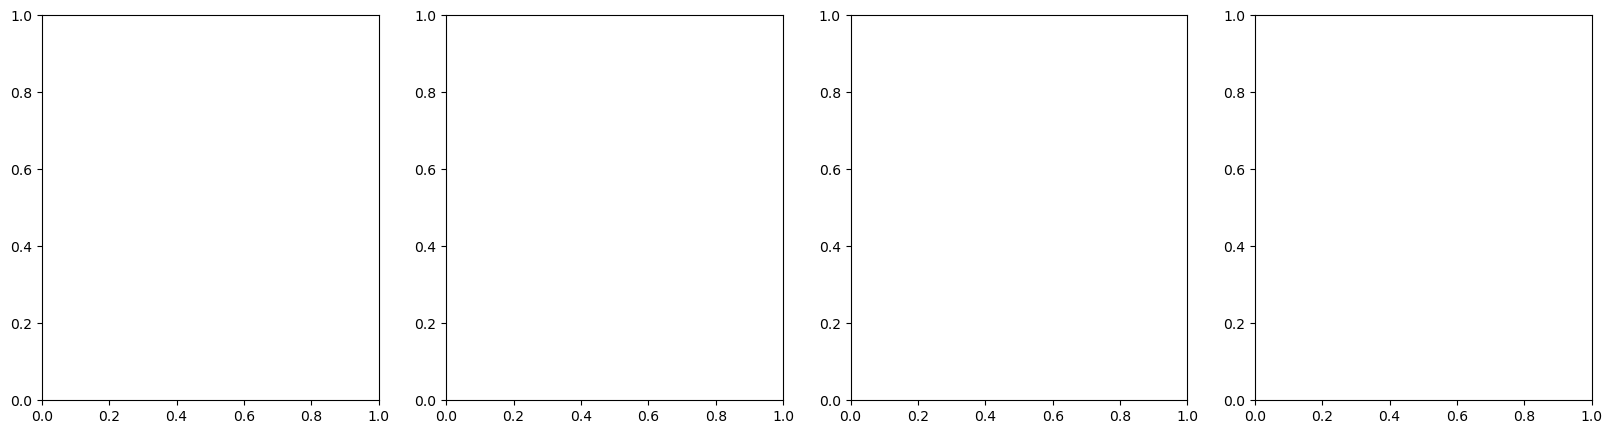

In [8]:
import matplotlib
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
etas = np.linspace(1e-3,5,30)
colors = matplotlib.colormaps.get_cmap('viridis').resampled(len(etas)).colors
i = 0


import matplotlib
gamma = np.array([1e-3,7e-4,5e-4,2.5e-4,1e-4,7e-5,5e-5,2.5e-5,1e-5])

sigma = np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45])



gamma_v, sigma_v= np.meshgrid(gamma,sigma)
s = np.zeros((9,9))
for i in range(len(gamma_v)):
    for j in range(len(sigma_v)):
        print(sigma_v[i,j])
        sorted_ev, sorted_evecs, s[i,j] = make_fit(sigma_v[i,j],gamma_v[i,j],5,sample[::500],4,1/2)


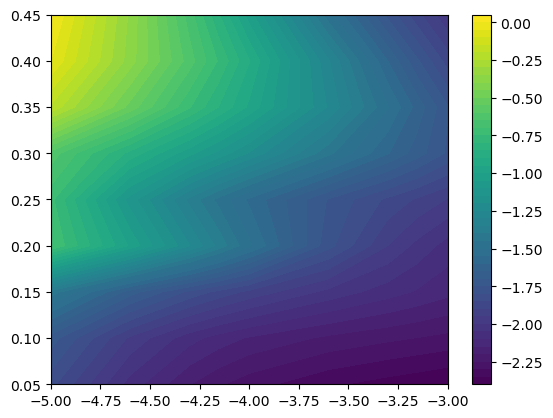

In [9]:

plt.contourf(np.log10(gamma_v),sigma_v,np.log10(s),levels=50)
plt.colorbar()
plt.show()


In [10]:
s.dump("data/empirical_bias.np")
gamma.dump("data/gamma.np")
sigma.dump("data/sigma_v.np")

In [11]:
gamma_rrr =1e-5
gamma_krr=1e-5
ev, eigvecs, s = make_fit(0.05,1e-5,5,sample[:1_000_000:500],4,1/2)
ev_5, eigvecs_5, s_5 = make_fit(0.5,1e-5,5,sample[:1_000_000:500],4,1/2)



5
2
(-0.7487320013445444+0j)
5
2
(-1.55365616272997+0j)


In [12]:
s_5

(0.9256157090927228+0j)

In [13]:
ev.dump("data/langevin/ev_05.np")
eigvecs.dump("data/langevin/eigvecs_05.np")
ev_5.dump("data/langevin/ev_5.np")
eigvecs_5.dump("data/langevin/eigvecs_5.np")
sample[:1_000_000:500].dump("data/langevin/x_axis.np")
